# Dilatação
Ref.: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c

In [ ]:
from skimage import data
from  skimage import io 
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

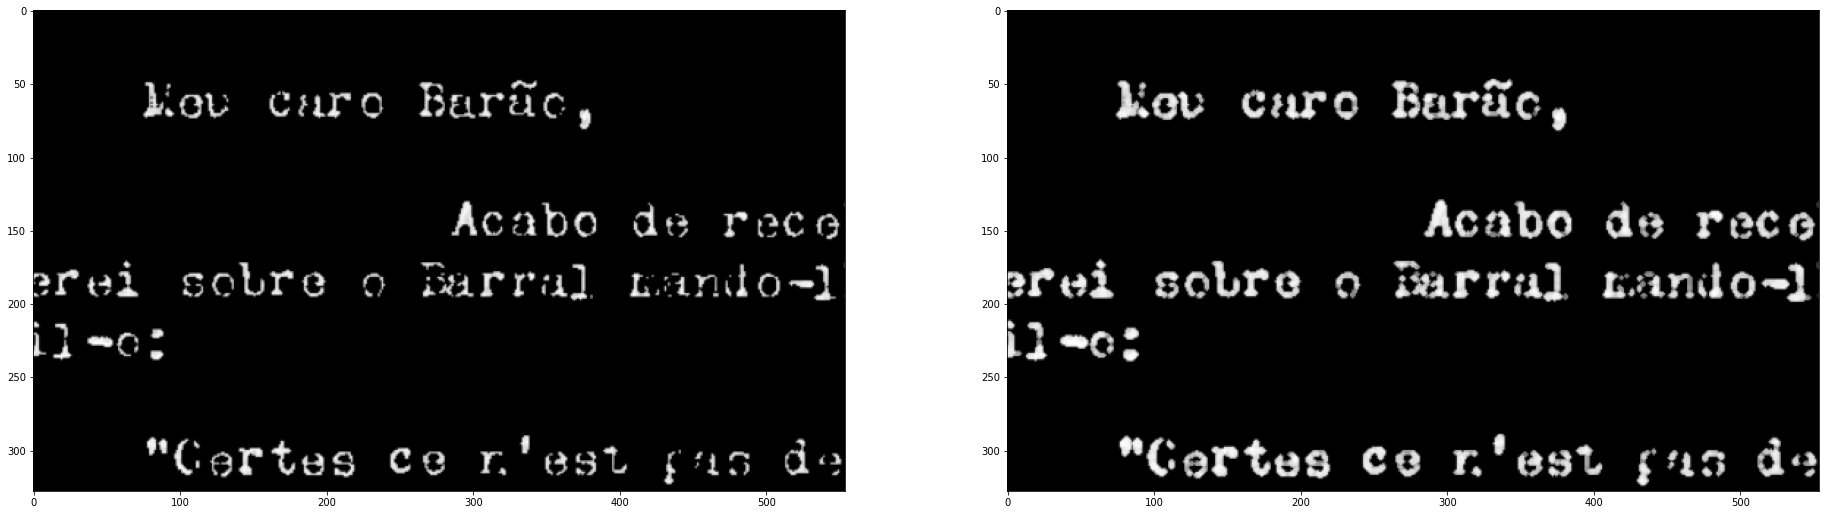

In [ ]:

image = cv2.imread('exemplo_dilatacao.png',0)
image = ~image 
# image = cv2.bitwise_not(image)  

# element = np.array([[0,1,0],
#                     [1,1,1],
#                     [0,1,0]],dtype=np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

dilatation_dst = cv2.dilate(image, element,iterations=1)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(dilatation_dst, cmap="gray")
plt.show()


# Erosão

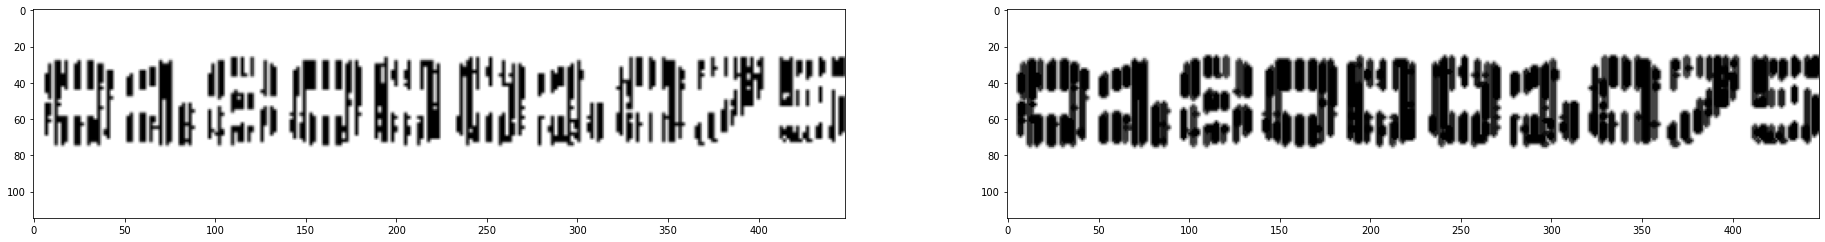

In [ ]:

image = cv2.imread('exemplo_erosao.png',0)

element = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]],dtype=np.uint8)

erode_dst = cv2.erode(image, element,iterations=1)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(erode_dst, cmap="gray")
plt.show()


# Abertura 
Ref:https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


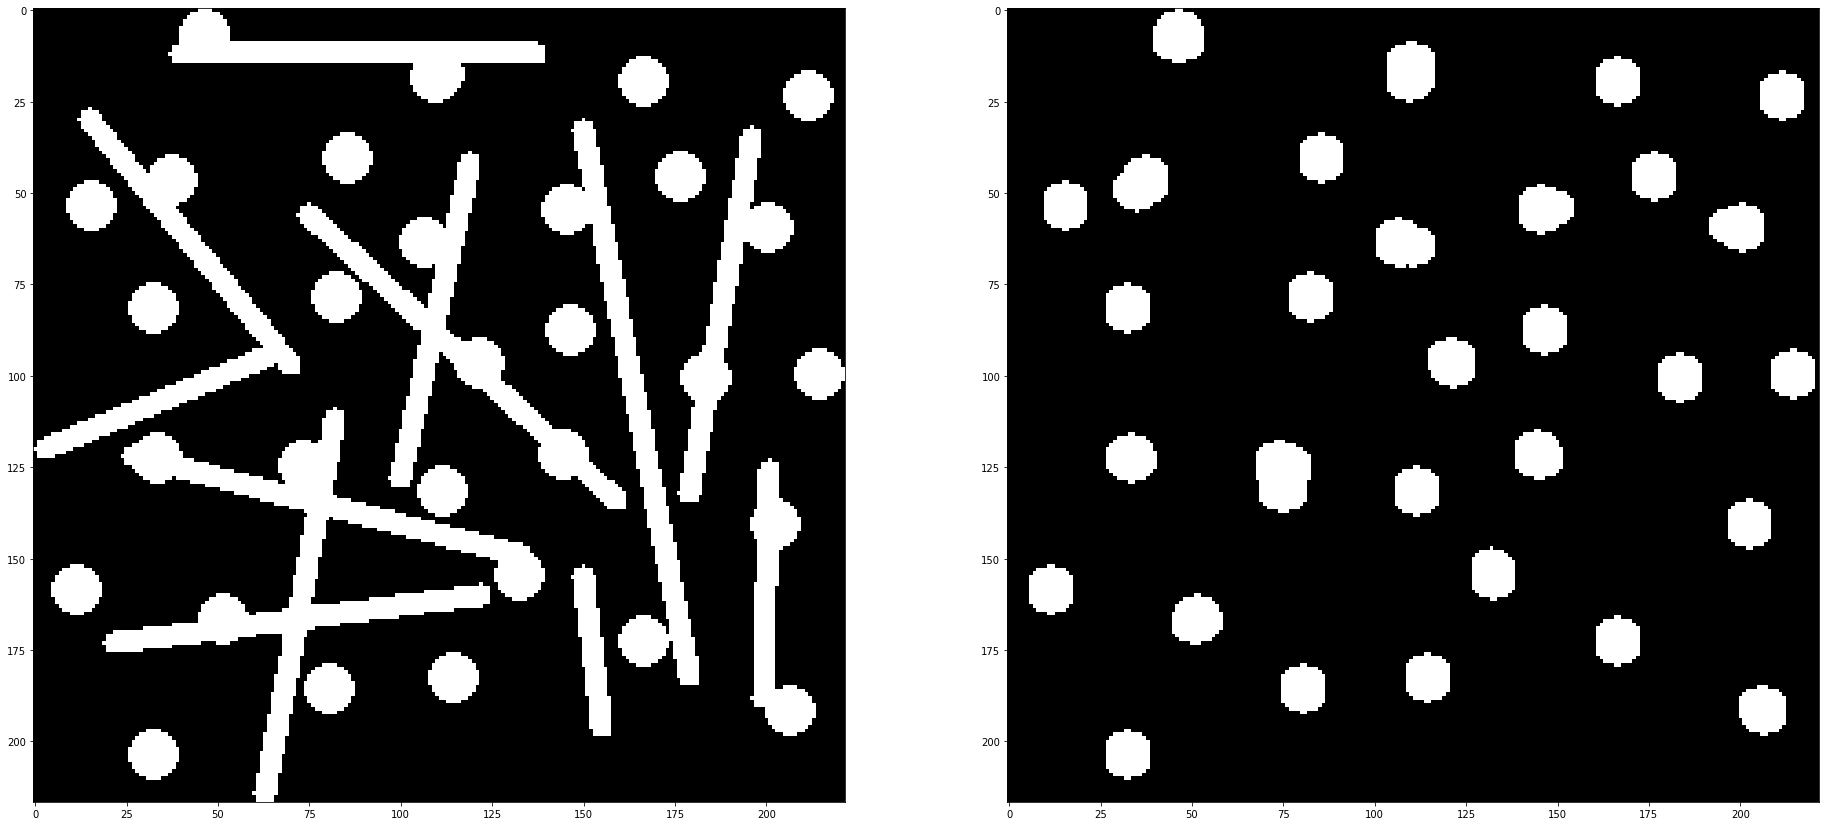

In [ ]:
image = cv2.imread('opening_exemplo.png',0)

element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
print(element)

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, element)


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(opening, cmap="gray")
plt.show()


# Fechamento
Ref.: https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

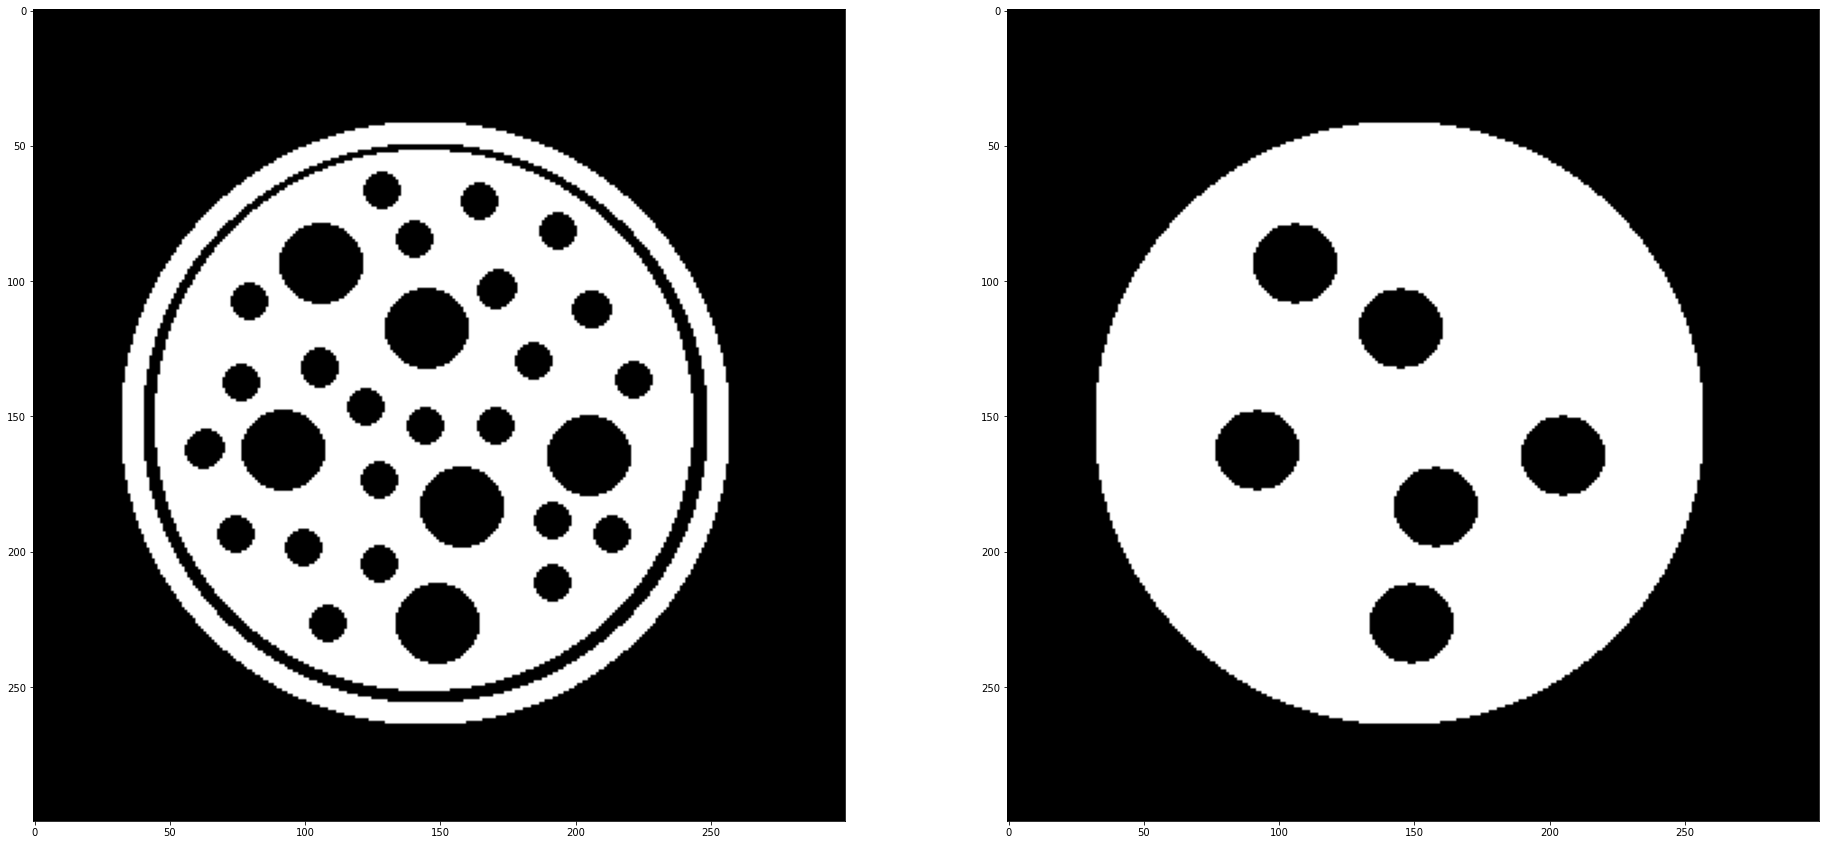

In [ ]:
image = cv2.imread('closing_operation.png',0)

element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
# print(element)

opening = cv2.morphologyEx(image, cv2.MORPH_CLOSE, element)


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(opening, cmap="gray")
plt.show()






# Esqueletização
Ref.:https://scikit-image.org/docs/stable/auto_examples/edges/plot_skeleton.html#sphx-glr-auto-examples-edges-plot-skeleton-py

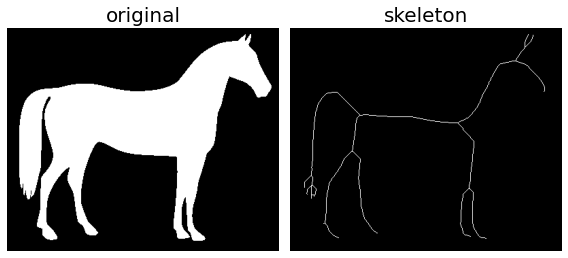

In [ ]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())
# cv2_imshow(data.horse()*255)

# perform skeletonization
# BW2 = bwmorph(im,'skel',Inf); (matlab)
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

# Afinamento
Ref.:https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.thin

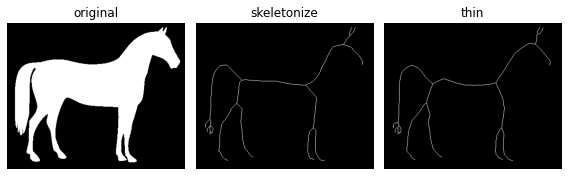

In [ ]:
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize,thin

# blobs = data.binary_blobs(200, blob_size_fraction=.2,
#                           volume_fraction=.35, seed=50)

blobs = invert(data.horse())
skeleton = skeletonize(blobs)


resu_thin = thin(blobs)

fig, axes = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeletonize')
ax[1].axis('off')

ax[2].imshow(resu_thin, cmap=plt.cm.gray)
ax[2].set_title('thin')
ax[2].axis('off')

fig.tight_layout()
plt.show()

# Extract horizontal and vertical lines by using morphological operations
**Referência:** https://docs.opencv.org/3.4/dd/dd7/tutorial_morph_lines_detection.html

In [ ]:
from google.colab import files as FILE
import os
import requests

img_data = requests.get('https://raw.githubusercontent.com/opencv/opencv/3.4/doc/tutorials/imgproc/morph_lines_detection/images/src.png').content
with open('src.png', 'wb') as handler:
    handler.write(img_data)


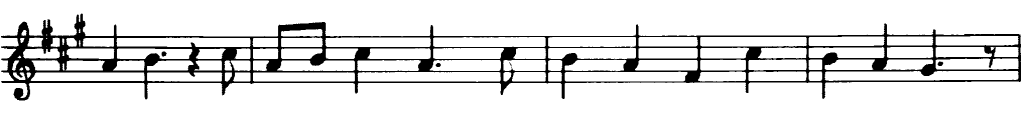

Show binary image


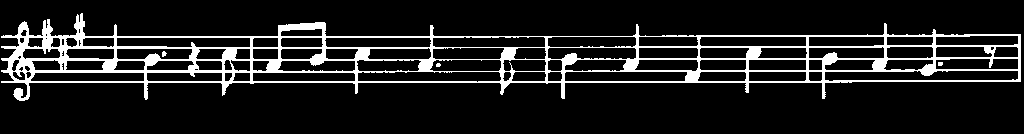

horizontal2


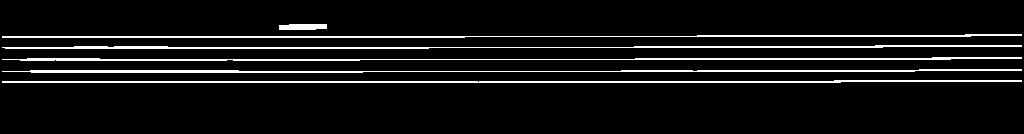

vertical


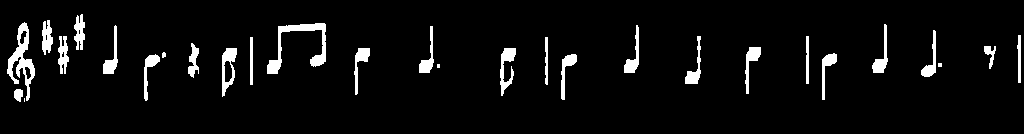

vertical_bit


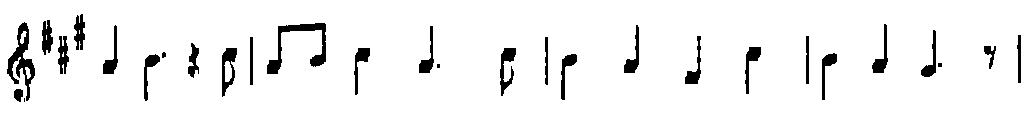

resultado final: 


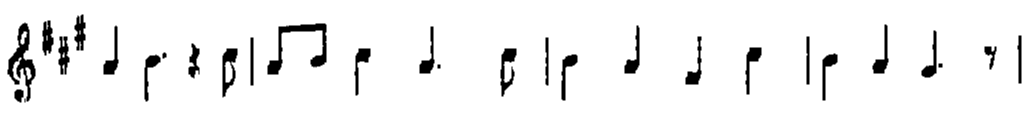

In [ ]:
"""
@file morph_lines_detection.py
@brief Use morphology transformations for extracting horizontal and vertical lines sample code
"""
from google.colab.patches import cv2_imshow # for image display
import numpy as np
import sys
import cv2 as cv


src = cv.imread('src.png', 0)
   
if src is not None:      
    # Show source image
    cv2_imshow(src)
    # [load_image]
    # [gray]
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    else:
        gray = src

    
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    # bitwise_not(): Inverts every bit of an array.
    gray = cv.bitwise_not(gray)
    # blockSize	, C
    bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
    # Show binary image
    print('Show binary image')
    cv2_imshow(bw)
    # show_wait_destroy("binary", bw)
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    vertical = np.copy(bw)
    # [init]
    # [horiz]

    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30

    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
    # print(horizontalStructure)
    # # Apply morphology operations
    # horizontal = cv.erode(horizontal, horizontalStructure)
    # horizontal = cv.dilate(horizontal, horizontalStructure)  
    horizontal = cv.morphologyEx(horizontal, cv.MORPH_OPEN, horizontalStructure)

   
    # Show extracted horizontal lines
    # show_wait_destroy("horizontal", horizontal)
    print("horizontal2")
    cv2_imshow(horizontal)
   
    # [horiz]
    # [vert]
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 30

    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    vertical = cv.erode(vertical, verticalStructure)
    vertical = cv.dilate(vertical, verticalStructure)

    # Show extracted vertical lines
    # show_wait_destroy("vertical", vertical)
    print("vertical")
    cv2_imshow(vertical)

    # [vert]
    # [smooth]
    # Inverse vertical image
    vertical = cv.bitwise_not(vertical)
    # show_wait_destroy("vertical_bit", vertical)
    print("vertical_bit")
    cv2_imshow(vertical)

   
    smooth = np.copy(vertical)
    # Step 4
    smooth = cv.blur(smooth, (2, 2))
    print("resultado final: ")
    cv2_imshow(smooth)
    # [smooth]
else: 
    print('imagem não encontrada!')  